# kNN (K-Nearest Neighbors from Scratch — Iris Dataset

## Цели анализа
- Изучить распределения признаков
- Проверить баланс классов
- Проанализировать взаимосвязи между признаками
- Оценить признаки, наиболее полезные для классификации методом k ближайших соседей (KNN)

In [1]:
import sys
import os

sys.path.append(os.path.abspath(".."))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.knn import KNN
from metrics.classification import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score as sk_accuracy

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [3]:
iris = load_iris(as_frame=True)

X = iris.data
y = iris.target

df = X.copy()
df["target"] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [6]:
df["target"].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [7]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

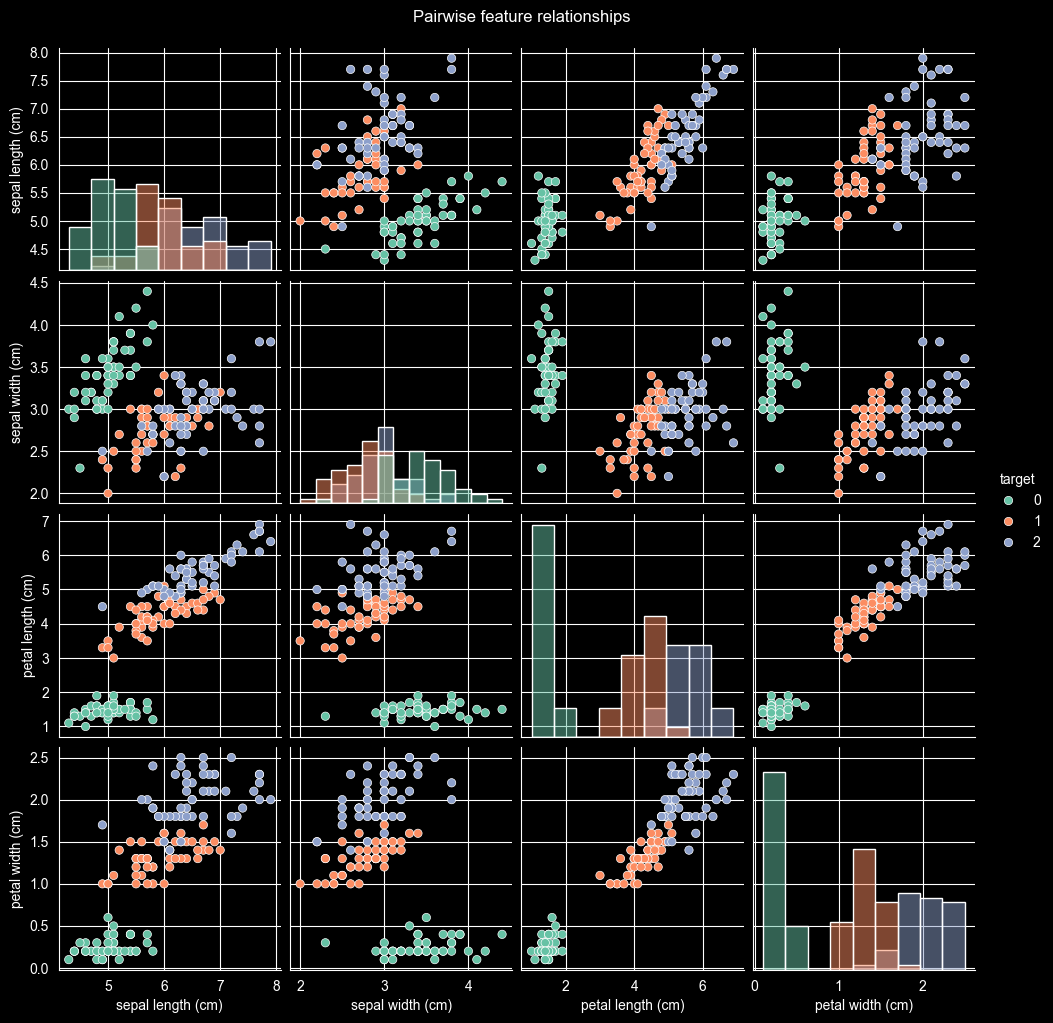

In [8]:
sns.pairplot(
    df,
    hue="target",
    diag_kind="hist",
    palette="Set2"
)
plt.suptitle("Pairwise feature relationships", y=1.02)
plt.show()

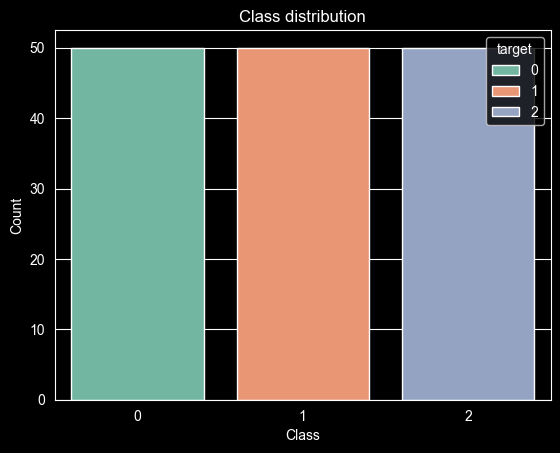

In [9]:
sns.countplot(
    x="target",
    data=df,
    palette="Set2",
    hue="target",
)
plt.title("Class distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

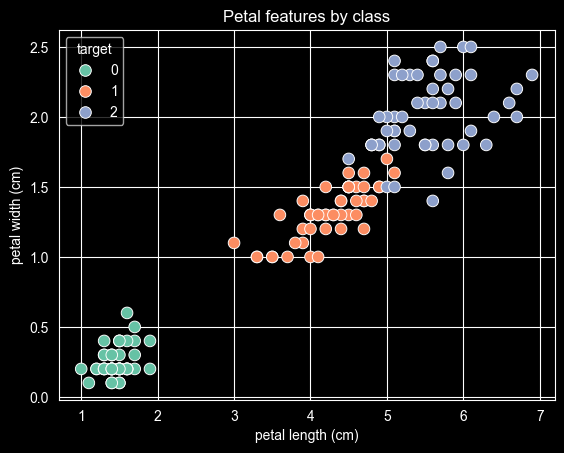

In [10]:
sns.scatterplot(
    data=df,
    x="petal length (cm)",
    y="petal width (cm)",
    hue="target",
    palette="Set2",
    s=70
)
plt.title("Petal features by class")
plt.show()

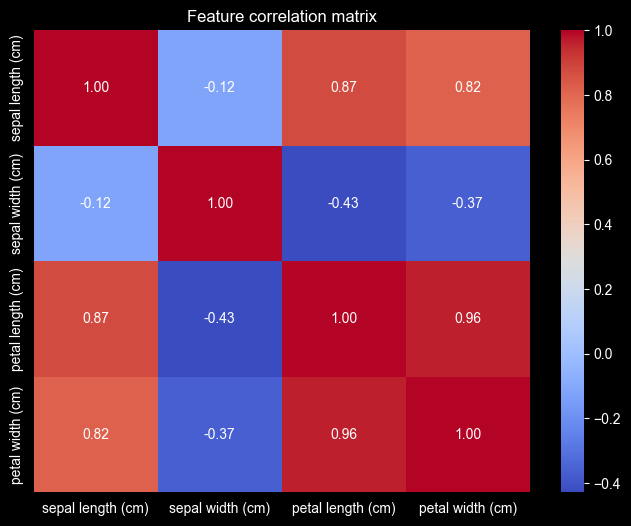

In [11]:
plt.figure(figsize=(8, 6))

sns.heatmap(
    df.iloc[:, :4].corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)

plt.title("Feature correlation matrix")
plt.show()

In [12]:
X_np = X.values
y_np = y.values

X_train, X_test, y_train, y_test = train_test_split(
    X_np,
    y_np,
    test_size=0.2,
    random_state=42,
    stratify=y_np
)

In [13]:
model = KNN(k=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.2%}")

Точность модели: 100.00%


In [14]:
sk_model = KNeighborsClassifier(n_neighbors=5)
sk_model.fit(X_train, y_train)

sk_pred = sk_model.predict(X_test)
accuracy_1 = sk_accuracy(y_test, sk_pred)
print(f"Точность модели sklearn: {accuracy_1:.2%}")

Точность модели sklearn: 100.00%



## Визуализация границ решений KNN

На графике ниже показано, как алгоритм K-ближайших соседей разделяет
пространство признаков по длине и ширине лепестка

In [21]:
feature_x = "petal length (cm)"
feature_y = "petal width (cm)"

X_vis = df[[feature_x, feature_y]].values
y_vis = df["target"].values

X_train_2d = X_train[:, [2, 3]]
knn_vis = KNN(k=5)
knn_vis.fit(X_train_2d, y_train)


x_min, x_max = X_train_2d[:, 0].min() - 0.5, X_train_2d[:, 0].max() + 0.5
y_min, y_max = X_train_2d[:, 1].min() - 0.5, X_train_2d[:, 1].max() + 0.5

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 150),
    np.linspace(y_min, y_max, 150)
)

grid_points = np.c_[xx.ravel(), yy.ravel()]

Z = knn_vis.predict(grid_points)
Z = Z.reshape(xx.shape)

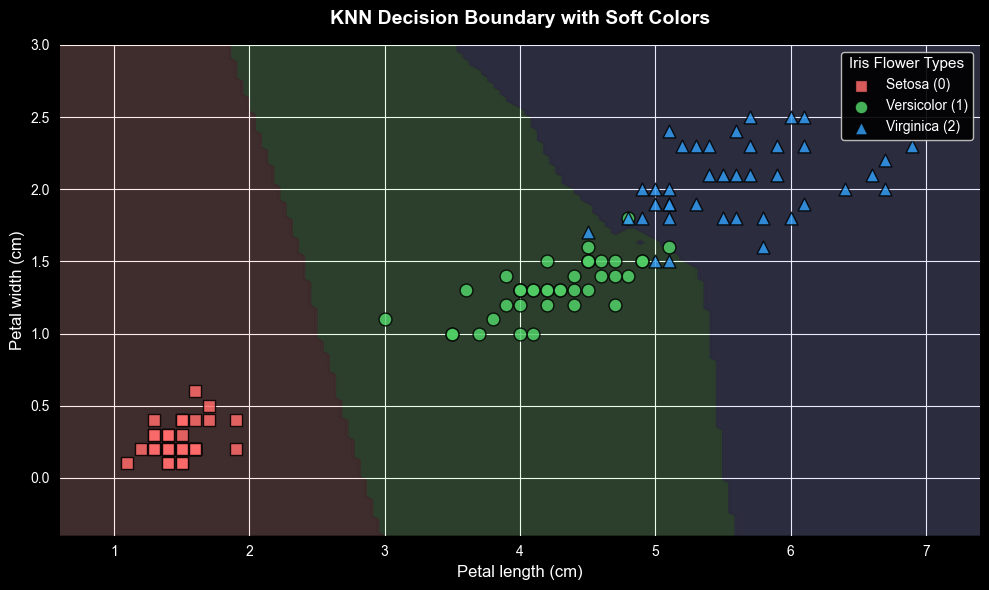

In [31]:
plt.figure(figsize=(10, 6))

from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFB3B3', '#B3FFB3', '#B3B3FF'])

colors = ['#FF6B6B', '#51CF66', '#339AF0']
markers = ['s', 'o', '^']
labels = ['Setosa (0)', 'Versicolor (1)', 'Virginica (2)']

plt.contourf(xx, yy, Z, alpha=0.25, cmap=cmap_light, antialiased=True)

for i in range(3):
    mask = (y_train == i)

    plt.scatter(
        X_train_2d[mask, 0],
        X_train_2d[mask, 1],
        c=colors[i],
        marker=markers[i],
        edgecolor='black',
        s=85,
        label=labels[i],
        alpha=0.85,
        linewidth=1.0
    )

plt.xlabel("Petal length (cm)", fontsize=12)
plt.ylabel("Petal width (cm)", fontsize=12)
plt.title("KNN Decision Boundary with Soft Colors", fontsize=14, fontweight='bold', pad=15)

plt.box(False)

plt.legend(title="Iris Flower Types",
          fontsize=10,
          title_fontsize=11,
          loc='upper right',
          framealpha=0.9,
          frameon=True)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.tight_layout()
plt.show()

## Выводы

- Датасет не содержит пропусков и является сбалансированным
- Признаки, связанные с лепестками, обладают высокой информативностью
- Признаки чашелистиков менее эффективны для разделения классов
- Метод k ближайших соседей (KNN) должен показывать высокое качество классификации
- Использование признаков длины и ширины лепестка оправдано для визуализации
  границ принятия решений
